<a href="https://colab.research.google.com/github/Sathsarani0412/Dyscalculia_Detection_App_Hapan_Mithuro-/blob/main/model3_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

Saving memory(1)_dataset.csv to memory(1)_dataset (4).csv


In [10]:
import pandas as pd

df = pd.read_csv("memory(1)_dataset.csv")
df.head()

,activity12_score,activity12_time_taken,activity13_score,activity13_time_taken,accuracy_rate,skipped_rate,memory_impairment
0,1,4,1,4,1.0,0.0,no_memory_issue
1,1,4,1,4,1.0,0.0,no_memory_issue
2,1,8,1,8,1.0,0.0,no_memory_issue
3,1,5,1,7,1.0,0.0,no_memory_issue
4,1,6,1,6,1.0,0.0,no_memory_issue


In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv("memory(1)_dataset.csv")

# Replace label values
df["memory_impairment"] = df["memory_impairment"].replace({
    "no_memory_issue": "no",
    "no_memory_issue_": "no",
    "yes_memory_issue": "yes",
    "yes_mmeory_issue": "yes",   # typo-safe
    "yes_memory_issue_": "yes"
})

# Check result
print(df["memory_impairment"].value_counts())

# Save corrected dataset
df.to_csv("memory_dataset_corrected.csv", index=False)


memory_impairment
no     80
yes    56
Name: count, dtype: int64


In [12]:
df = pd.read_csv("memory_dataset_corrected.csv")
df.head()

,activity12_score,activity12_time_taken,activity13_score,activity13_time_taken,accuracy_rate,skipped_rate,memory_impairment
0,1,4,1,4,1.0,0.0,no
1,1,4,1,4,1.0,0.0,no
2,1,8,1,8,1.0,0.0,no
3,1,5,1,7,1.0,0.0,no
4,1,6,1,6,1.0,0.0,no


In [13]:
df.info()
df.describe()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   activity12_score       136 non-null    int64  
 1   activity12_time_taken  136 non-null    int64  
 2   activity13_score       136 non-null    int64  
 3   activity13_time_taken  136 non-null    int64  
 4   accuracy_rate          136 non-null    float64
 5   skipped_rate           136 non-null    float64
 6   memory_impairment      136 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 7.6+ KB
activity12_score         0
activity12_time_taken    0
activity13_score         0
activity13_time_taken    0
accuracy_rate            0
skipped_rate             0
memory_impairment        0
dtype: int64


In [14]:
df = df.fillna(df.median(numeric_only=True))


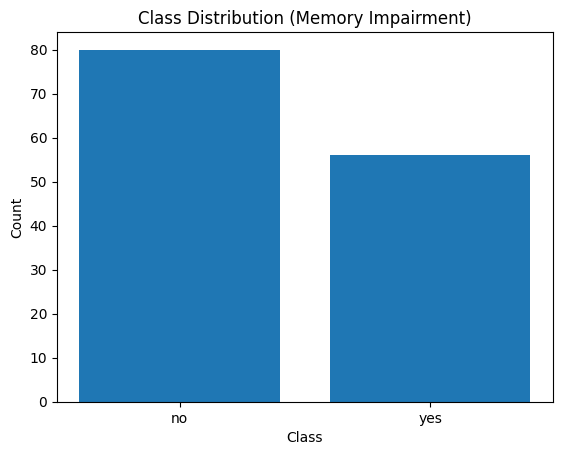

In [15]:
import matplotlib.pyplot as plt

class_counts = df["memory_impairment"].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.title("Class Distribution (Memory Impairment)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


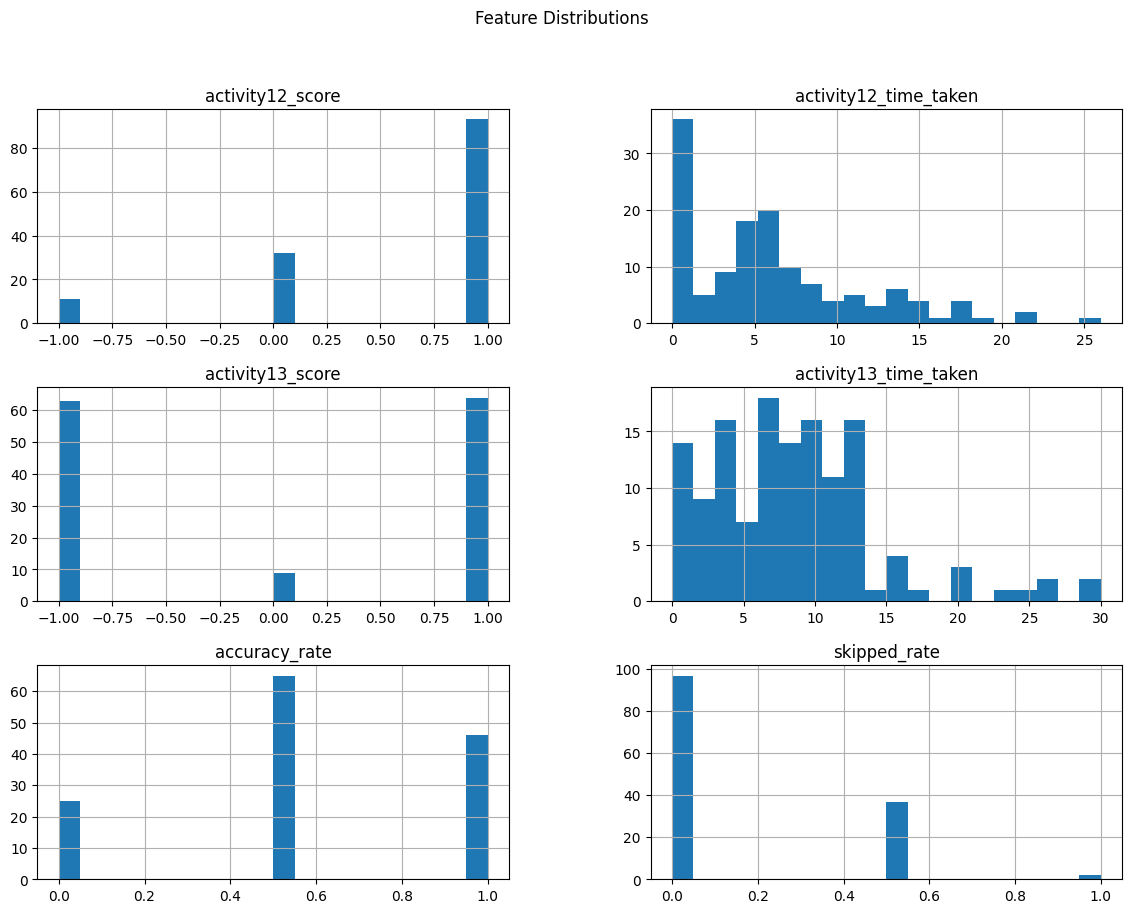

In [16]:
df.drop(columns=["memory_impairment"]).hist(
    figsize=(14,10), bins=20
)
plt.suptitle("Feature Distributions")
plt.show()


In [17]:
label_map = {"no": 0, "yes": 1}
df["memory_impairment"] = df["memory_impairment"].map(label_map)

X = df.drop(columns=["memory_impairment"])
y = df["memory_impairment"]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", y_train.value_counts())
print("Validation:", y_val.value_counts())
print("Test:", y_test.value_counts())


Train: memory_impairment
0    56
1    39
Name: count, dtype: int64
Validation: memory_impairment
0    12
1     8
Name: count, dtype: int64
Test: memory_impairment
0    12
1     9
Name: count, dtype: int64


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


rf = RandomForestClassifier(n_estimators=200, random_state=42)

rf.fit(X_train, y_train)





RandomForestClassifier(n_estimators=200, random_state=42)

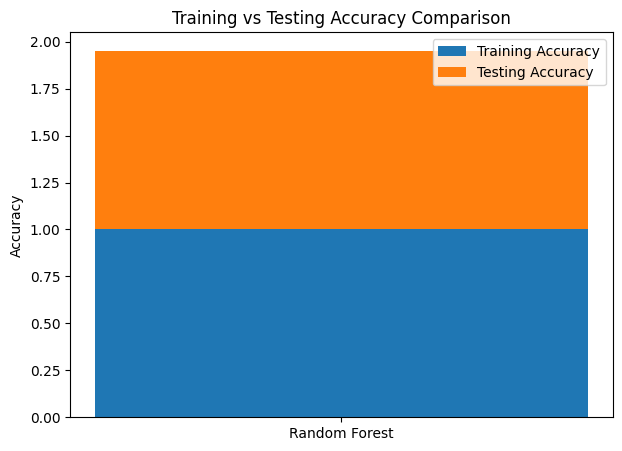

In [34]:
from sklearn.metrics import accuracy_score

models = {

    "Random Forest": rf,

}

train_acc = []
test_acc = []

for model in models.values():
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(7,5))
plt.bar(models.keys(), train_acc, label="Training Accuracy")
plt.bar(models.keys(), test_acc, bottom=train_acc, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy Comparison")
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = rf   # change to dt or svm after comparison

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9523809523809523

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.90      1.00      0.95         9

    accuracy                           0.95        21
   macro avg       0.95      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21


Confusion Matrix:

[[11  1]
 [ 0  9]]


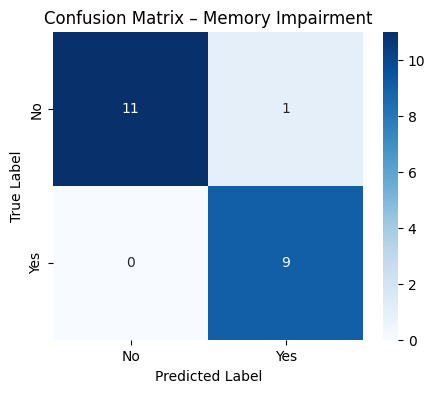

In [36]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Memory Impairment")
plt.show()


In [37]:
print("Training Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))


Training Accuracy: 1.0
Testing Accuracy: 0.9523809523809523


In [38]:
import joblib

joblib.dump(best_model, "memory_model.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")


['feature_names.pkl']

In [44]:
import joblib
import pandas as pd

# Load model and feature names
model = joblib.load("memory_model.pkl")
feature_names = joblib.load("feature_names.pkl")

# Create input data with EXACT feature names
input_data = pd.DataFrame([{
    "activity12_score": 1,
    "activity12_time_taken": 40,
    "activity13_score": 1,
    "activity13_time_taken": 55,
    "accuracy_rate": 1.00,
    "skipped_rate": 0.00
}])

# Reorder columns to match training
input_data = input_data[feature_names]

# Predict
prediction = model.predict(input_data)[0]

label_reverse = {
    0: "No Memory Impairment",
    1: "Memory Impairment"
}

print("Predicted Memory Status:", label_reverse[prediction])


Predicted Memory Status: No Memory Impairment
